In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
cd /content/drive/MyDrive/Xử lí ảnh (DHMT18A, LAB)/Project_02
# https://github.com/RajdeepMondal/Contour-Detection/blob/master/contour%20detection.py
# https://theailearner.com/tag/suzuki-contour-algorithm-opencv/

/content/drive/MyDrive/Xử lí ảnh (DHMT18A, LAB)/Project_02


In [28]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [29]:
def show(image):
  plt.imshow(image, cmap='gray')
  plt.axis('off')
  plt.show()

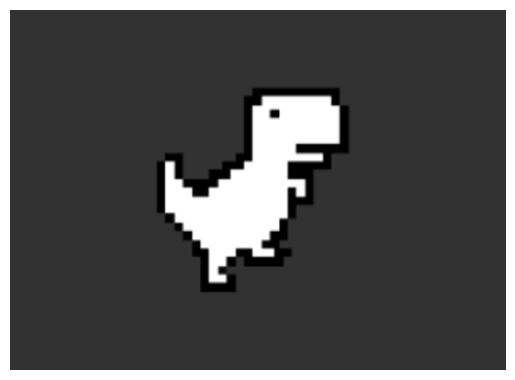

In [30]:
img = cv.imread('image/contour.png', cv.IMREAD_GRAYSCALE)
show(img)

In [31]:
ret, thresh = cv.threshold(img, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

array([[55, 53, 53, ..., 53, 53, 53],
       [52, 50, 50, ..., 50, 50, 50],
       [52, 50, 50, ..., 50, 50, 50],
       ...,
       [52, 50, 50, ..., 50, 50, 50],
       [52, 50, 50, ..., 50, 50, 50],
       [52, 50, 50, ..., 50, 50, 50]], dtype=uint8)
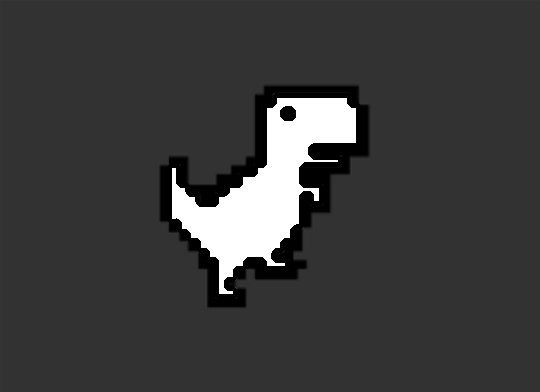

In [32]:
cv.drawContours(img, contours, -1, (0,255,0), 3)
# cv2.drawContours(image, contours, 3, (0,255,0), 3)

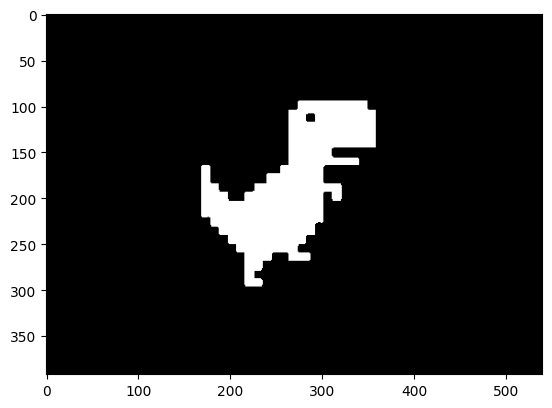

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def is_valid_pixel(image, visited, x, y):
    """ Check if a pixel is within the image bounds and hasn't been visited yet. """
    return (0 <= x < image.shape[0] and 0 <= y < image.shape[1]) and image[x, y] == 1 and not visited[x, y]

def find_contour(image, visited, start_x, start_y):
    """ Find and return the contour of an object starting from (start_x, start_y). """
    contour = []
    directions = [(-1, 0), (0, 1), (1, 0), (0, -1)]  # Up, Right, Down, Left

    x, y = start_x, start_y
    visited[x, y] = True
    contour.append((x, y))

    direction_index = 0  # Start moving up (arbitrary choice)

    while True:
        found_next_pixel = False
        for i in range(len(directions)):
            new_dir_index = (direction_index + i) % 4
            new_x = x + directions[new_dir_index][0]
            new_y = y + directions[new_dir_index][1]

            if is_valid_pixel(image, visited, new_x, new_y):
                contour.append((new_x, new_y))
                visited[new_x, new_y] = True
                x, y = new_x, new_y
                direction_index = new_dir_index  # Update movement direction
                found_next_pixel = True
                break

        if not found_next_pixel:
            break

    return contour

def findContours(image):
    """ Main function to find all contours in a binary image. """
    visited = np.zeros_like(image, dtype=bool)  # Keep track of visited pixels
    contours = []

    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            if image[x, y] == 1 and not visited[x, y]:  # Found an unvisited object pixel
                contour = find_contour(image, visited, x, y)
                contours.append(contour)

    return contours

# Example usage
# Binary image (1s represent object pixels, 0s represent background)
binary_image = np.array([[0, 0, 0, 0, 0, 0],
                         [0, 1, 1, 0, 1, 1],
                         [0, 1, 1, 0, 1, 1],
                         [0, 0, 0, 0, 0, 0],
                         [0, 1, 1, 0, 0, 0],
                         [0, 1, 1, 0, 0, 0]])

contours = findContours(thresh)

# Visualizing the result
for contour in contours:
    contour = np.array(contour)
    plt.plot(contour[:, 1], contour[:, 0])  # Plot contour points

plt.imshow(thresh, cmap='gray')
plt.show()
